# 1. Scatter Plot Clustering

              A   B   C  D   E    F    G    H   I    J  ...   P   Q  R    S  \
Date                                                    ...                   
2019-01-01  526   3   9  0  66  472  260  116  45  202  ...  85  38  0   97   
2019-01-02  504  11  10  0  57  472  157  108   3  223  ...  73   0  0   92   
2019-01-03  499   0  10  0  42  475  154  104   0  199  ...  65  20  5   84   
2019-01-04  504   0   7  0  57  464  149   83  17  198  ...  83  19  0   89   
2019-01-05  499  15   9  0  31  466  159   84  14  219  ...  97  31  0  104   

             T  U   V    W   X   Y  
Date                                
2019-01-01  19  7   0  174  55  12  
2019-01-02  45  0  14  132  65   8  
2019-01-03  89  0   4  132  39   6  
2019-01-04   0  0  14  143  57  20  
2019-01-05   0  8  28   46  44  15  

[5 rows x 25 columns]
   Price  Profit   Sales  Marketing  Cost
A     21       6  175173      21000    15
B     28      16    4489       3000    12
C     43       2    3649       3000   

/var/folders/pb/_45838w13ds5fcrv51k520zh0000gn/T/ipykernel_55571/3366588101.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(name, (summary_data['Marketing'][i] + 500, summary_data['Sales'][i]))


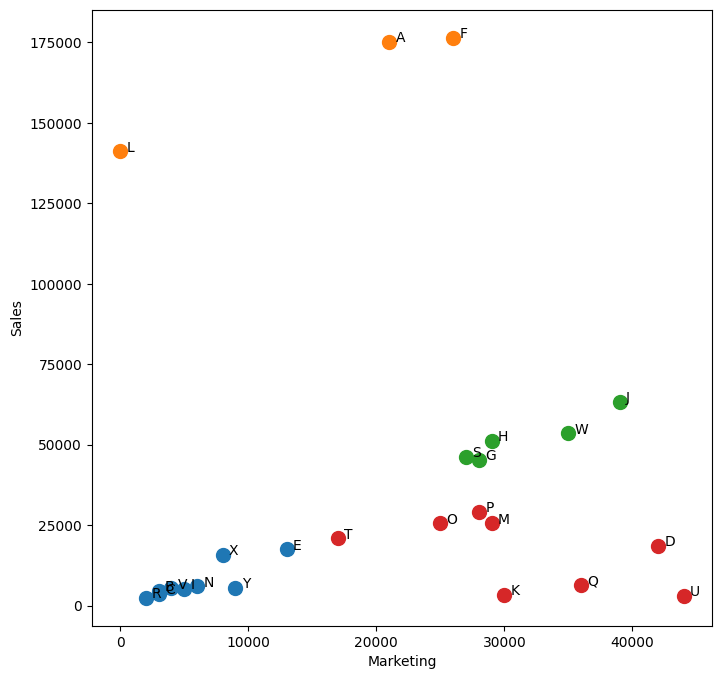

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/DailySales.csv', index_col=0)
print(data.head())

marketing_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/MarketingPerProduct.csv', index_col=0)
price_per_unit = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/PricePerUnit.csv', index_col=0)
profit_per_unit = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/ProfitPerUnit.csv', index_col=0)

summary_data = pd.DataFrame(index=data.columns)
summary_data['Price'] = price_per_unit.values
summary_data['Profit'] = profit_per_unit.values
summary_data['Sales'] = data.sum().values
summary_data['Marketing'] = marketing_data.values
summary_data['Cost'] = summary_data['Price'] - summary_data['Profit']
print(summary_data.head())
print(summary_data.describe())

k = 4
selected = ['Marketing', 'Sales']
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
summary_data['label'] = k_means.fit_predict(summary_data[selected])

clusters = []
for c in range(k):
    clusters.append(summary_data[summary_data['label'] == c])

plt.figure(figsize=(8, 8))
for c in range(k):
    plt.scatter(clusters[c]['Marketing'], clusters[c]['Sales'], s=100)
for i, name in enumerate(summary_data.index):
    plt.annotate(name, (summary_data['Marketing'][i] + 500, summary_data['Sales'][i]))
plt.xlabel('Marketing')
plt.ylabel('Sales')
plt.show()

# 2. Line Plot Clustering

              A   B   C  D   E    F    G    H   I    J  ...   P   Q  R    S  \
Date                                                    ...                   
2019-01-01  526   3   9  0  66  472  260  116  45  202  ...  85  38  0   97   
2019-01-02  504  11  10  0  57  472  157  108   3  223  ...  73   0  0   92   
2019-01-03  499   0  10  0  42  475  154  104   0  199  ...  65  20  5   84   
2019-01-04  504   0   7  0  57  464  149   83  17  198  ...  83  19  0   89   
2019-01-05  499  15   9  0  31  466  159   84  14  219  ...  97  31  0  104   

             T  U   V    W   X   Y  
Date                                
2019-01-01  19  7   0  174  55  12  
2019-01-02  45  0  14  132  65   8  
2019-01-03  89  0   4  132  39   6  
2019-01-04   0  0  14  143  57  20  
2019-01-05   0  8  28   46  44  15  

[5 rows x 25 columns]
   Price  Profit   Sales  Marketing  Cost
A     21       6  175173      21000    15
B     28      16    4489       3000    12
C     43       2    3649       3000   

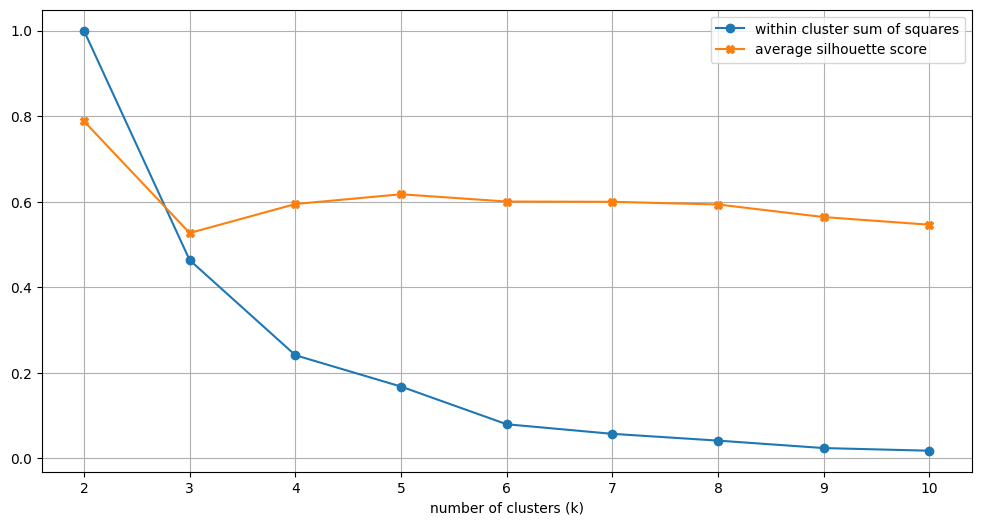

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/DailySales.csv', index_col=0)
print(data.head())

marketing_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/MarketingPerProduct.csv', index_col=0)
price_per_unit = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/PricePerUnit.csv', index_col=0)
profit_per_unit = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/ProfitPerUnit.csv', index_col=0)

summary_data = pd.DataFrame(index=data.columns)
summary_data['Price'] = price_per_unit.values
summary_data['Profit'] = profit_per_unit.values
summary_data['Sales'] = data.sum().values
summary_data['Marketing'] = marketing_data.values
summary_data['Cost'] = summary_data['Price'] - summary_data['Profit']
print(summary_data.head())
print(summary_data.describe())

selected = ['Marketing', 'Sales']
min_k = 2
max_k = 10
k_values = range(min_k, max_k + 1)
WCSS = []
silhouette = []
for k in k_values:
    k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
    labels = k_means.fit_predict(summary_data[selected])
    WCSS.append(k_means.inertia_)
    silhouette.append(silhouette_score(summary_data[selected], labels))
WCSS = np.asarray(WCSS) / max(WCSS)

plt.figure(figsize=(12, 6))
plt.plot(k_values, WCSS, marker='o', label='within cluster sum of squares')
plt.plot(k_values, silhouette, marker='X', label='average silhouette score')
plt.xlabel('number of clusters (k)')
plt.legend()
plt.grid()
plt.show()

# 3. Box Plot Spending Income

  Gender  Age  Income  Spending
0      M   77      28        52
1      F   20      38        47
2      F   35      48        84
3      F   53      25        35
4      M   73      24        30
              Age      Income    Spending
count  300.000000  300.000000  300.000000
mean    42.273333   38.316667   45.876667
std     16.142093   17.413419   26.087481
min     18.000000    8.000000    0.000000
25%     29.000000   25.750000   26.750000
50%     38.000000   39.000000   45.000000
75%     53.000000   50.000000   68.000000
max     78.000000   90.000000   96.000000


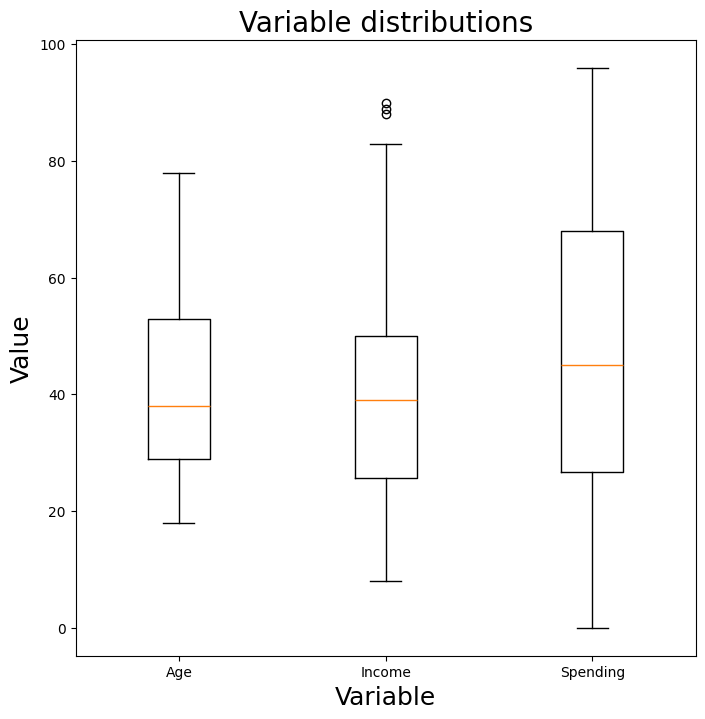

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

profiles = pd.read_csv('https://tinyurl.com/ChrisCoDV/CustomerProfiles.csv')
print(profiles.head())
print(profiles.describe())

selected = ['Age', 'Income', 'Spending']

plt.figure(figsize=(8, 8))
plt.boxplot(profiles[selected], labels=selected)
plt.xlabel('Variable', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.title('Variable distributions', fontsize=20)
plt.show()

# 4. Histogram Ages

  Gender  Age  Income  Spending
0      M   77      28        52
1      F   20      38        47
2      F   35      48        84
3      F   53      25        35
4      M   73      24        30
              Age      Income    Spending
count  300.000000  300.000000  300.000000
mean    42.273333   38.316667   45.876667
std     16.142093   17.413419   26.087481
min     18.000000    8.000000    0.000000
25%     29.000000   25.750000   26.750000
50%     38.000000   39.000000   45.000000
75%     53.000000   50.000000   68.000000
max     78.000000   90.000000   96.000000
7 bins


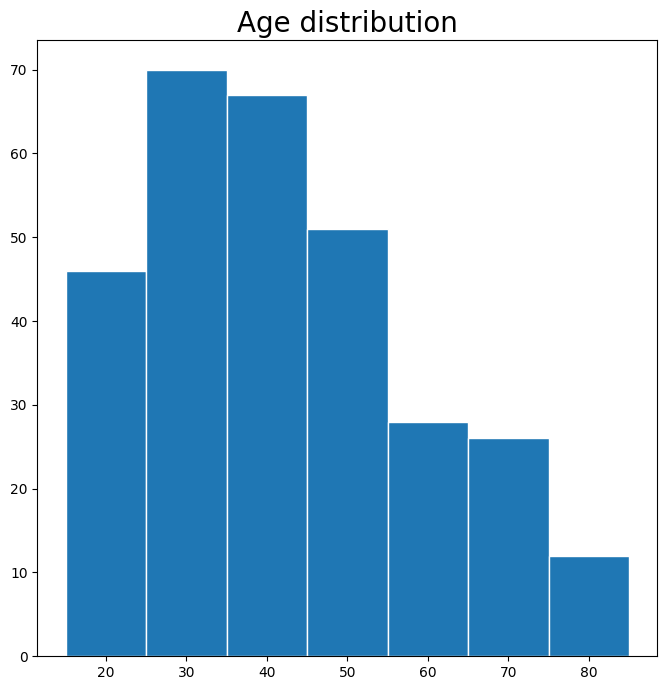

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

profiles = pd.read_csv('https://tinyurl.com/ChrisCoDV/CustomerProfiles.csv')
print(profiles.head())
print(profiles.describe())

x_min = 15
x_max = 85
bin_width = 10
n_bins = int((x_max - x_min) / bin_width)
print(f'{n_bins} bins')
bins = [(x_min + x * bin_width) for x in range(n_bins + 1)]
# print(bins)

plt.figure(figsize=(8, 8))
plt.hist(profiles['Age'], bins=bins, edgecolor='w')
plt.title('Age distribution', fontsize=20)
plt.show()

# 5. Histogram Spending

  Gender  Age  Income  Spending
0      M   77      28        52
1      F   20      38        47
2      F   35      48        84
3      F   53      25        35
4      M   73      24        30
              Age      Income    Spending
count  300.000000  300.000000  300.000000
mean    42.273333   38.316667   45.876667
std     16.142093   17.413419   26.087481
min     18.000000    8.000000    0.000000
25%     29.000000   25.750000   26.750000
50%     38.000000   39.000000   45.000000
75%     53.000000   50.000000   68.000000
max     78.000000   90.000000   96.000000
10 bins


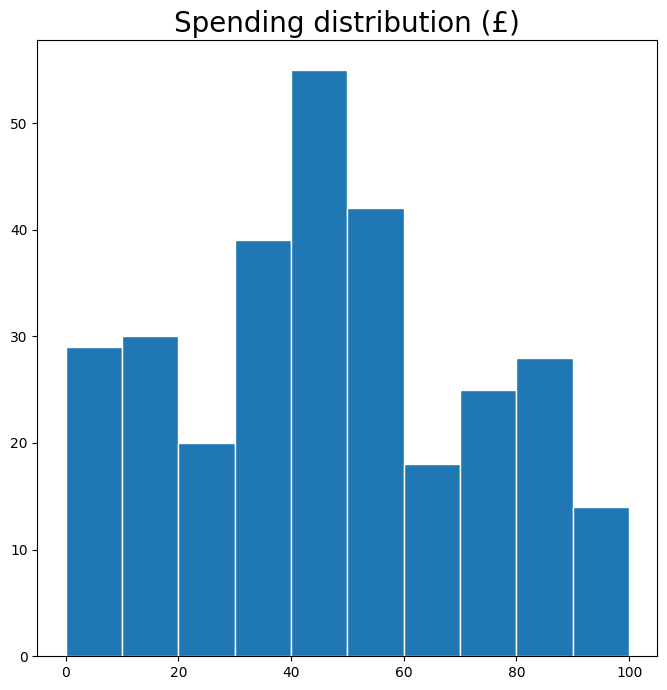

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

profiles = pd.read_csv('https://tinyurl.com/ChrisCoDV/CustomerProfiles.csv')
print(profiles.head())
print(profiles.describe())

x_min = 0
x_max = 100
bin_width = 10
n_bins = int((x_max - x_min) / bin_width)
print(f'{n_bins} bins')
bins = [(x_min + x * bin_width) for x in range(n_bins + 1)]
# print(bins)

plt.figure(figsize=(8, 8))
plt.hist(profiles['Spending'], bins=bins, edgecolor='w')
plt.title('Spending distribution (£)', fontsize=20)
plt.show()

# 6. Histogram Income

  Gender  Age  Income  Spending
0      M   77      28        52
1      F   20      38        47
2      F   35      48        84
3      F   53      25        35
4      M   73      24        30
              Age      Income    Spending
count  300.000000  300.000000  300.000000
mean    42.273333   38.316667   45.876667
std     16.142093   17.413419   26.087481
min     18.000000    8.000000    0.000000
25%     29.000000   25.750000   26.750000
50%     38.000000   39.000000   45.000000
75%     53.000000   50.000000   68.000000
max     78.000000   90.000000   96.000000
10 bins


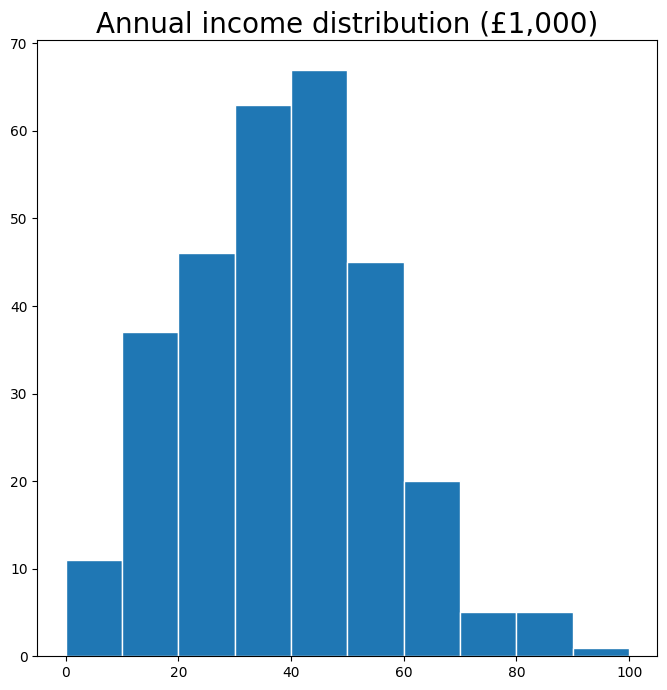

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

profiles = pd.read_csv('https://tinyurl.com/ChrisCoDV/CustomerProfiles.csv')
print(profiles.head())
print(profiles.describe())

x_min = 0
x_max = 100
bin_width = 10
n_bins = int((x_max - x_min) / bin_width)
print(f'{n_bins} bins')
bins = [(x_min + x * bin_width) for x in range(n_bins + 1)]
# print(bins)

plt.figure(figsize=(8, 8))
plt.hist(profiles['Income'], bins=bins, edgecolor='w')
plt.title('Annual income distribution (£1,000)', fontsize=20)
plt.show()

# 7. Scatter Plot 3D Profiles

  Gender  Age  Income  Spending
0      M   77      28        52
1      F   20      38        47
2      F   35      48        84
3      F   53      25        35
4      M   73      24        30
              Age      Income    Spending
count  300.000000  300.000000  300.000000
mean    42.273333   38.316667   45.876667
std     16.142093   17.413419   26.087481
min     18.000000    8.000000    0.000000
25%     29.000000   25.750000   26.750000
50%     38.000000   39.000000   45.000000
75%     53.000000   50.000000   68.000000
max     78.000000   90.000000   96.000000


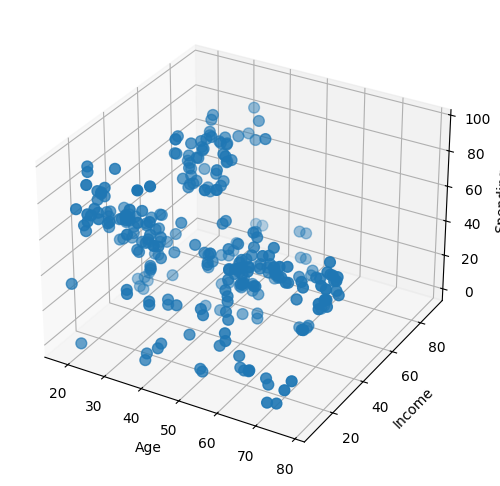

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D scatter plot, even though not directly used

profiles = pd.read_csv('https://tinyurl.com/ChrisCoDV/CustomerProfiles.csv')
print(profiles.head())
print(profiles.describe())

fig = plt.figure(figsize=(10, 6))
sub = fig.add_subplot(111, projection='3d')
sub.scatter(profiles['Age'], profiles['Income'], profiles['Spending'], s=60)
# sub.view_init(30, 5)
sub.set_xlabel('Age')
sub.set_ylabel('Income')
sub.set_zlabel('Spending')
plt.show()

# 8. Line Plot Profiles Clusterings

  Gender  Age  Income  Spending
0      M   77      28        52
1      F   20      38        47
2      F   35      48        84
3      F   53      25        35
4      M   73      24        30
              Age      Income    Spending
count  300.000000  300.000000  300.000000
mean    42.273333   38.316667   45.876667
std     16.142093   17.413419   26.087481
min     18.000000    8.000000    0.000000
25%     29.000000   25.750000   26.750000
50%     38.000000   39.000000   45.000000
75%     53.000000   50.000000   68.000000
max     78.000000   90.000000   96.000000


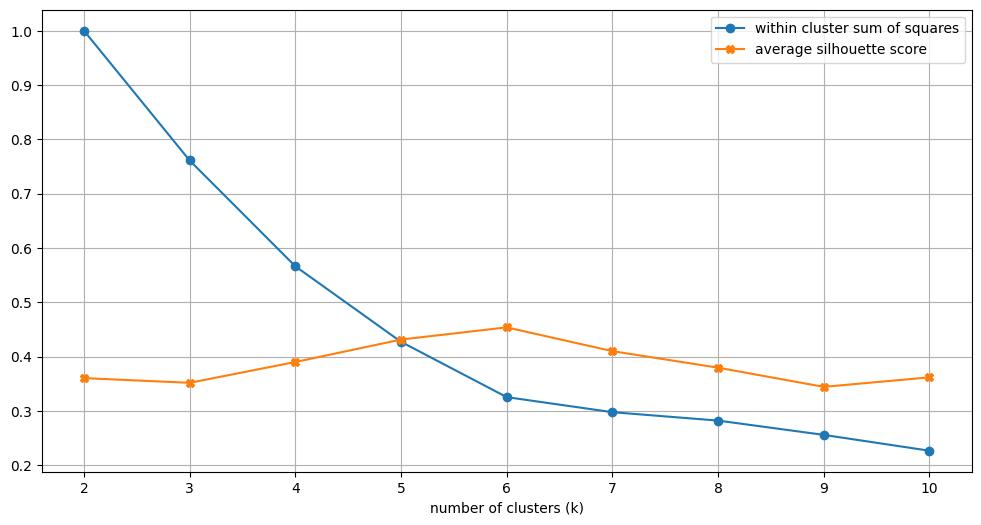

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

profiles = pd.read_csv('https://tinyurl.com/ChrisCoDV/CustomerProfiles.csv')
print(profiles.head())
print(profiles.describe())

selected = ['Age', 'Income', 'Spending']
min_k = 2
max_k = 10
k_values = range(min_k, max_k + 1)
WCSS = []
silhouette = []
for k in k_values:
    k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
    labels = k_means.fit_predict(profiles[selected])
    WCSS.append(k_means.inertia_)
    silhouette.append(silhouette_score(profiles[selected], labels))
WCSS = np.asarray(WCSS) / max(WCSS)

plt.figure(figsize=(12, 6))
plt.plot(k_values, WCSS, marker='o', label='within cluster sum of squares')
plt.plot(k_values, silhouette, marker='X', label='average silhouette score')
plt.xlabel('number of clusters (k)')
plt.legend()
plt.grid()
plt.show()

# 9. Scatter Plots Profiles Clustering

  Gender  Age  Income  Spending
0      M   77      28        52
1      F   20      38        47
2      F   35      48        84
3      F   53      25        35
4      M   73      24        30
              Age      Income    Spending
count  300.000000  300.000000  300.000000
mean    42.273333   38.316667   45.876667
std     16.142093   17.413419   26.087481
min     18.000000    8.000000    0.000000
25%     29.000000   25.750000   26.750000
50%     38.000000   39.000000   45.000000
75%     53.000000   50.000000   68.000000
max     78.000000   90.000000   96.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Gender    300 non-null    object
 1   Age       300 non-null    int64 
 2   Income    300 non-null    int64 
 3   Spending  300 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.5+ KB
None


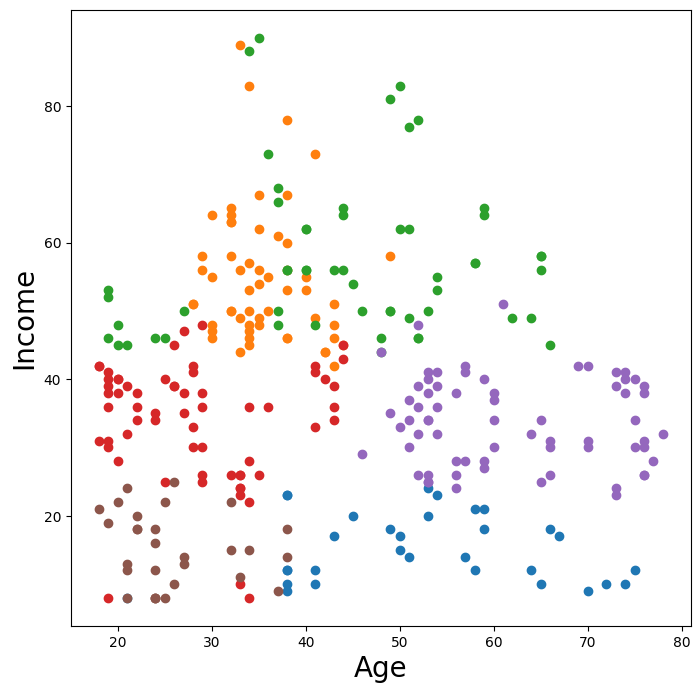

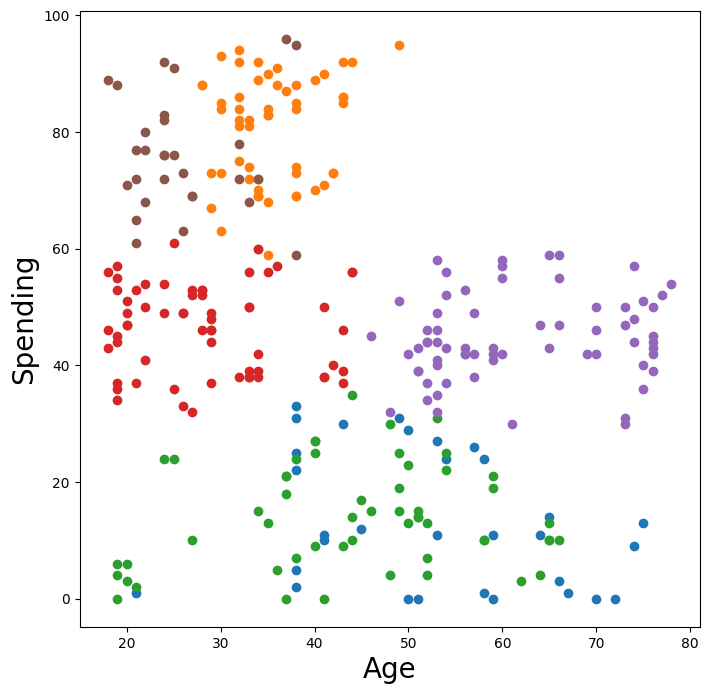

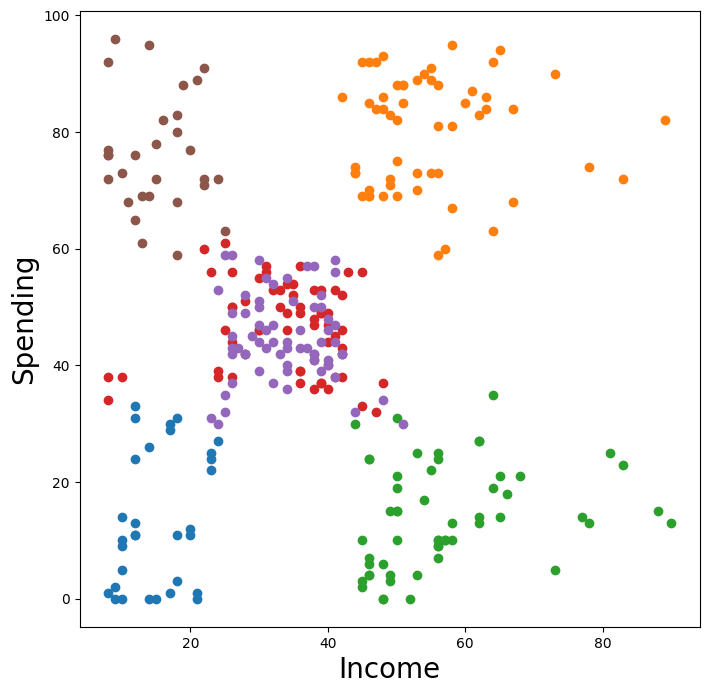

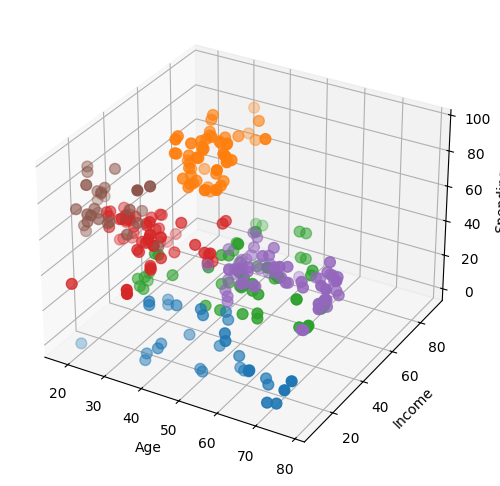

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D scatter plot, even though not directly used

profiles = pd.read_csv('https://tinyurl.com/ChrisCoDV/CustomerProfiles.csv')
print(profiles.head())
print(profiles.describe())
print(profiles.info())

k = 6
selected = ['Age', 'Income', 'Spending']

k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
profiles['label'] = k_means.fit_predict(profiles[selected])
clusters = []
for c in range(k):
    clusters.append(profiles[profiles['label'] == c])

plt.figure(figsize=(8, 8))
for c in range(k):
    plt.scatter(clusters[c]['Age'], clusters[c]['Income'])
plt.xlabel('Age', fontsize=20)
plt.ylabel('Income', fontsize=20)
plt.show()

plt.figure(figsize=(8, 8))
for c in range(k):
    plt.scatter(clusters[c]['Age'], clusters[c]['Spending'])
plt.xlabel('Age', fontsize=20)
plt.ylabel('Spending', fontsize=20)
plt.show()

plt.figure(figsize=(8, 8))
for c in range(k):
    plt.scatter(clusters[c]['Income'], clusters[c]['Spending'])
plt.xlabel('Income', fontsize=20)
plt.ylabel('Spending', fontsize=20)
plt.show()

fig = plt.figure(figsize=(10, 6))
sub = fig.add_subplot(111, projection='3d')
for c in range(k):
    sub.scatter(clusters[c]['Age'], clusters[c]['Income'], clusters[c]['Spending'], s=60)
# sub.view_init(30, 185)
sub.set_xlabel('Age')
sub.set_ylabel('Income')
sub.set_zlabel('Spending')
plt.show()

# 10. Radar Plot Ratings Subplots

K    1.420
A    1.563
E    1.635
G    1.785
J    2.084
X    2.101
Q    2.748
B    2.771
R    2.773
C    2.878
M    2.885
U    2.966
O    2.969
V    3.015
F    3.062
I    3.079
P    3.122
W    3.227
N    3.258
Y    3.317
L    3.999
H    4.010
S    4.203
T    4.211
D    4.244
dtype: float64
   Rating 1  Rating 2  Rating 3  Rating 4  Rating 5  Rating 6  Rating 7  \
A  0.227459  0.258197  0.776639  0.274227  0.308489  0.262605  0.270833   
B  0.682377  0.756148  0.303279  0.389691  0.296066  0.579832  0.437500   
C  0.331967  0.409836  0.795082  0.781443  0.795031  0.777311  0.883333   
D  0.934426  1.000000  0.647541  0.936082  0.973085  0.878151  0.943750   
E  0.297131  0.284836  0.729508  0.342268  0.267081  0.338235  0.304167   

   Rating 8  Rating 9  Rating 10  
A  0.220833  0.241237   0.383197  
B  0.962500  0.661856   0.655738  
C  0.466667  0.424742   0.288934  
D  0.585417  0.927835   0.938525  
E  0.245833  0.282474   0.282787  


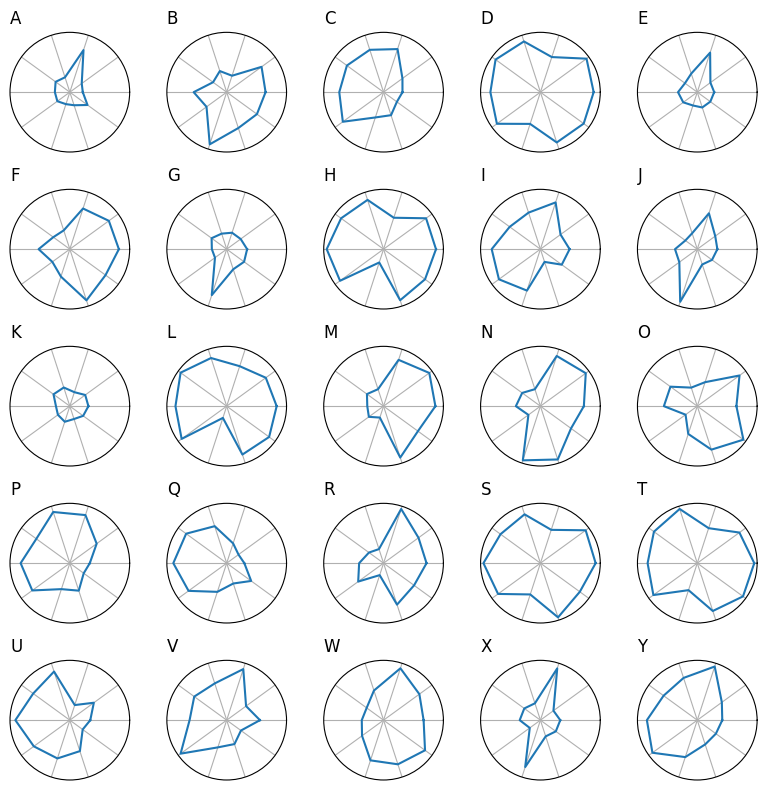

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ratings = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/Ratings.csv', index_col=0)
print(ratings.mean(axis=1).sort_values())

normalised_data = ratings / ratings.max()
print(normalised_data.head())

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(8, 8))
counter = 1
for name in normalised_data.index:
    # values = normalised_data.transpose()[name].values.flatten().tolist()
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(5, 5, counter, polar=True)
    sub.plot(angles, values)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels([])
    sub.set_title(name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

# 11. Line Plot Ratings Clusterings

   Rating 1  Rating 2  Rating 3  Rating 4  Rating 5  Rating 6  Rating 7  \
A      1.11      1.26      3.79      1.33      1.49      1.25      1.30   
B      3.33      3.69      1.48      1.89      1.43      2.76      2.10   
C      1.62      2.00      3.88      3.79      3.84      3.70      4.24   
D      4.56      4.88      3.16      4.54      4.70      4.18      4.53   
E      1.45      1.39      3.56      1.66      1.29      1.61      1.46   

   Rating 8  Rating 9  Rating 10  
A      1.06      1.17       1.87  
B      4.62      3.21       3.20  
C      2.24      2.06       1.41  
D      2.81      4.50       4.58  
E      1.18      1.37       1.38  
A    1.563
B    2.771
C    2.878
D    4.244
E    1.635
F    3.062
G    1.785
H    4.010
I    3.079
J    2.084
K    1.420
L    3.999
M    2.885
N    3.258
O    2.969
P    3.122
Q    2.748
R    2.773
S    4.203
T    4.211
U    2.966
V    3.015
W    3.227
X    2.101
Y    3.317
dtype: float64


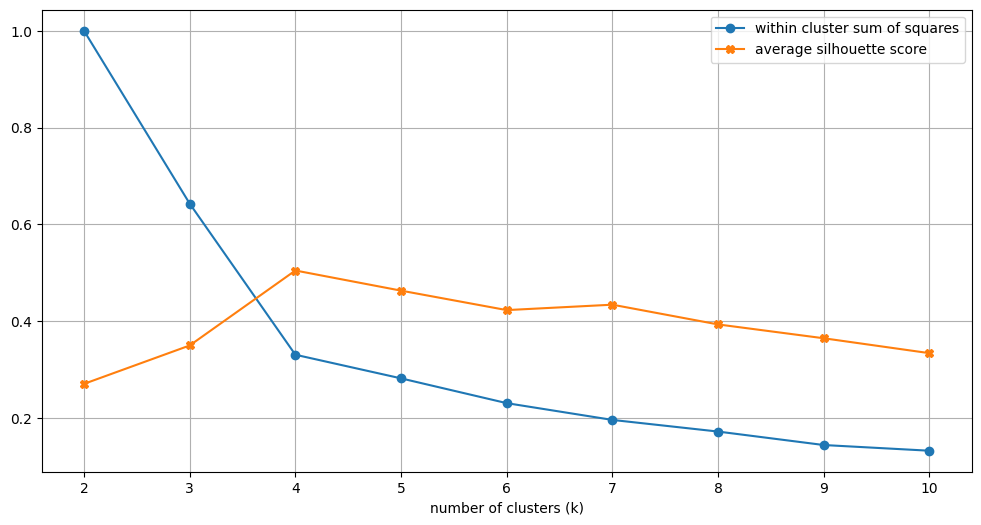

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ratings = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/Ratings.csv', index_col=0)
print(ratings.head())
print(ratings.mean(axis=1))

selected = ratings.columns
min_k = 2
max_k = 10
k_values = range(min_k, max_k + 1)
WCSS = []
silhouette = []
for k in k_values:
    k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
    labels = k_means.fit_predict(ratings[selected])
    WCSS.append(k_means.inertia_)
    silhouette.append(silhouette_score(ratings[selected], labels))
WCSS = np.asarray(WCSS) / max(WCSS)

plt.figure(figsize=(12, 6))
plt.plot(k_values, WCSS, marker='o', label='within cluster sum of squares')
plt.plot(k_values, silhouette, marker='X', label='average silhouette score')
plt.xlabel('number of clusters (k)')
plt.legend()
plt.grid()
plt.show()

# 12. Scatter Plot Ratings Clustering

   Rating 1  Rating 2  Rating 3  Rating 4  Rating 5  Rating 6  Rating 7  \
A      1.11      1.26      3.79      1.33      1.49      1.25      1.30   
B      3.33      3.69      1.48      1.89      1.43      2.76      2.10   
C      1.62      2.00      3.88      3.79      3.84      3.70      4.24   
D      4.56      4.88      3.16      4.54      4.70      4.18      4.53   
E      1.45      1.39      3.56      1.66      1.29      1.61      1.46   

   Rating 8  Rating 9  Rating 10  
A      1.06      1.17       1.87  
B      4.62      3.21       3.20  
C      2.24      2.06       1.41  
D      2.81      4.50       4.58  
E      1.18      1.37       1.38  
A    1.563
B    2.771
C    2.878
D    4.244
E    1.635
F    3.062
G    1.785
H    4.010
I    3.079
J    2.084
K    1.420
L    3.999
M    2.885
N    3.258
O    2.969
P    3.122
Q    2.748
R    2.773
S    4.203
T    4.211
U    2.966
V    3.015
W    3.227
X    2.101
Y    3.317
dtype: float64


/var/folders/pb/_45838w13ds5fcrv51k520zh0000gn/T/ipykernel_55571/409378276.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(name, (ratings['Rating 1'][i] + 0.05, ratings['Rating 2'][i]))


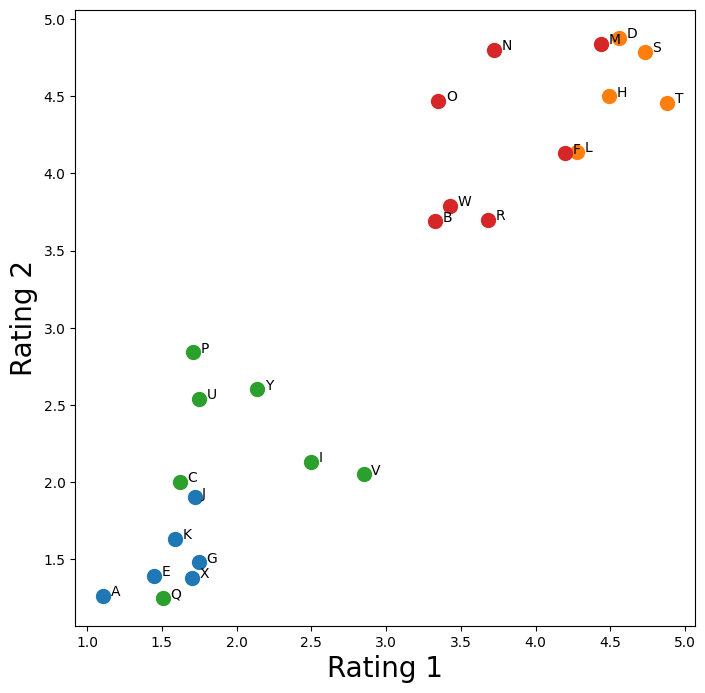

/var/folders/pb/_45838w13ds5fcrv51k520zh0000gn/T/ipykernel_55571/409378276.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(name, (ratings['Rating 3'][i] + 0.05, ratings['Rating 8'][i]))


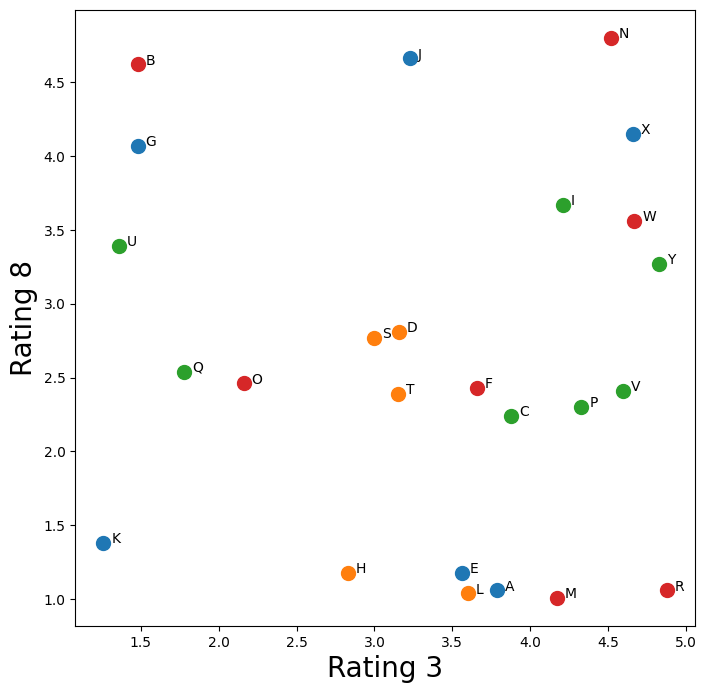

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

ratings = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/Ratings.csv', index_col=0)
print(ratings.head())
print(ratings.mean(axis=1))

k = 4
selected = ratings.columns

k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
ratings['label'] = k_means.fit_predict(ratings[selected])
clusters = []
for c in range(k):
    clusters.append(ratings[ratings['label'] == c])

plt.figure(figsize=(8, 8))
for c in range(k):
    plt.scatter(clusters[c]['Rating 1'], clusters[c]['Rating 2'], s=100)
for i, name in enumerate(ratings.index):
    plt.annotate(name, (ratings['Rating 1'][i] + 0.05, ratings['Rating 2'][i]))
plt.xlabel('Rating 1', fontsize=20)
plt.ylabel('Rating 2', fontsize=20)
plt.show()

plt.figure(figsize=(8, 8))
for c in range(k):
    plt.scatter(clusters[c]['Rating 3'], clusters[c]['Rating 8'], s=100)
for i, name in enumerate(ratings.index):
    plt.annotate(name, (ratings['Rating 3'][i] + 0.05, ratings['Rating 8'][i]))
plt.xlabel('Rating 3', fontsize=20)
plt.ylabel('Rating 8', fontsize=20)
plt.show()